In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LassoCV,RidgeCV
from scipy.stats import ttest_ind, levene
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score,RepeatedKFold
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectFromModel

In [2]:
data_LA = pd.read_csv("input/LA_total.csv",index_col=0)
data_XA = pd.read_csv("input/XA_total.csv",index_col=0)


data_LA_ = pd.DataFrame()
columns_LA = data_LA.columns
for col in columns_LA:
    try:
        df = data_LA[col].astype(np.float64)
        data_LA_ = pd.concat([data_LA_,df],axis=1)
    except:
        pass
    continue
    
data_XA_ = pd.DataFrame()
columns_XA = data_XA.columns
for col in columns_XA:
    try:
        df = data_XA[col].astype(np.float64)
        data_XA_ = pd.concat([data_XA_,df],axis=1)
    except:
        pass
    continue

# 方差齐性
index_ = []
for col in data_LA_.columns:
    if levene(data_LA_[col],data_XA_[col])[1] > 0.05:
        if ttest_ind(data_LA_[col],data_XA_[col])[1] < 0.05:
            index_.append(col)
    else:
        if ttest_ind(data_LA_[col],data_XA_[col],equal_var=False)[1] < 0.05:
            index_.append(col)


data_L_T = data_LA_[index_]
data_X_T = data_XA_[index_]

In [3]:
data = pd.concat([data_L_T,data_X_T])
data = shuffle(data)
data

,MVI,diagnosticsImage-originalMean,diagnosticsImage-originalMinimum,diagnosticsMask-originalVoxelNum,originalshapeFlatness,originalshapeLeastAxisLength,originalshapeMaximum2DDiameterRow,originalshapeMaximum2DDiameterSlice,originalshapeMeshVolume,originalshapeMinorAxisLength,...,wavelet-LLLglszmGrayLevelNonUniformity,wavelet-LLLglszmLowGrayLevelZoneEmphasis,wavelet-LLLglszmSizeZoneNonUniformity,wavelet-LLLglszmSizeZoneNonUniformityNormalized,wavelet-LLLglszmSmallAreaEmphasis,wavelet-LLLglszmZoneEntropy,wavelet-LLLglszmZonePercentage,wavelet-LLLngtdmCoarseness,wavelet-LLLngtdmContrast,wavelet-LLLngtdmStrength
X72,1.0,-536.312044,-1024.0,1106.0,0.618720,15.119735,29.051897,24.736381,4804.663124,20.683710,...,19.902077,0.008343,104.596439,0.310375,0.572526,6.194587,0.304702,0.006557,0.126203,2.175939
L15,0.0,-588.835832,-1024.0,1093.0,0.525269,13.955686,31.007214,20.188393,4216.977300,16.759595,...,20.439791,0.007541,121.670157,0.318508,0.578298,6.268157,0.349497,0.005460,0.165912,1.846171
X71,1.0,-634.072420,-1024.0,2133.0,0.283388,13.782744,51.217272,40.237572,7874.423046,17.433931,...,59.682292,0.038791,110.630208,0.288100,0.550979,5.175773,0.180028,0.003327,0.028897,0.118561
X51,1.0,-994.266200,-3024.0,623.0,0.429637,10.297708,23.792237,18.281250,2241.416931,14.105722,...,9.742647,0.008288,103.617647,0.380947,0.638468,6.379339,0.436597,0.007027,0.398170,5.186549
L12,0.0,-576.331786,-1024.0,1086.0,0.622722,14.028509,27.659763,21.533132,4023.722656,20.035546,...,20.568627,0.012342,97.235294,0.317762,0.583071,6.145672,0.281768,0.006230,0.117356,2.568301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X54,1.0,-1064.102123,-3024.0,272.0,0.440344,7.411768,15.998170,12.989519,621.850641,11.479013,...,7.596026,0.012134,66.536424,0.440639,0.688513,5.601571,0.555147,0.020511,0.399724,4.764679
X29,1.0,-610.121335,-1024.0,944.0,0.494888,11.778834,28.120555,24.960426,3848.676173,18.467200,...,21.438596,0.004341,189.394737,0.415339,0.668297,6.152979,0.483051,0.007679,0.189509,3.972529
X28,1.0,-666.203147,-1024.0,287.0,0.359794,6.872296,21.605943,14.780577,1042.929611,10.939385,...,8.030303,0.048335,34.535354,0.348842,0.603800,5.145680,0.344948,0.039154,0.075891,3.717743
L52,0.0,-620.813483,-1024.0,5249.0,0.573858,23.268326,41.748175,48.856055,19690.859380,30.373199,...,114.811057,0.009208,480.682295,0.336377,0.600516,5.992634,0.272242,0.001339,0.059543,0.198260


In [4]:
target = data.iloc[:, 0]
features = data.iloc[:,1:]

features
target.nunique()

2

In [5]:
transfer = StandardScaler()
features_SS = transfer.fit_transform(features)

features_SS = pd.DataFrame(features_SS)
features_SS

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,0.718436,0.362143,-0.260801,1.193858,0.424165,-0.136313,-0.070668,-0.206980,0.262916,0.795224,...,-0.308989,-0.480120,-0.168415,-0.508033,-0.489286,0.787946,-0.442571,-0.444605,-0.260338,-0.431452
1,0.363558,0.362143,-0.265829,0.723902,0.270292,-0.014857,-0.375329,-0.259496,-0.139572,1.236752,...,-0.295531,-0.501355,-0.073717,-0.449602,-0.435059,0.890435,-0.223804,-0.460325,-0.180397,-0.451695
2,0.057915,0.362143,0.136459,-0.492480,0.247432,1.240509,0.967728,0.067333,-0.070406,-0.457476,...,0.686680,0.326203,-0.134949,-0.668072,-0.691702,-0.631342,-1.051440,-0.490882,-0.456234,-0.557743
3,-2.375744,-2.761340,-0.447633,0.242986,-0.213245,-0.463022,-0.503085,-0.436031,-0.411774,0.590217,...,-0.563272,-0.481583,-0.173844,-0.001011,0.130195,1.045320,0.201568,-0.437871,0.287183,-0.246647
4,0.448042,0.362143,-0.268537,1.213982,0.279919,-0.222787,-0.285248,-0.276765,0.196436,0.685269,...,-0.292306,-0.374214,-0.209244,-0.454960,-0.390214,0.719804,-0.554572,-0.449292,-0.278149,-0.407367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-2.847593,-2.761340,-0.583405,0.296830,-0.594730,-0.947157,-0.857569,-0.580755,-0.681190,-0.447816,...,-0.617001,-0.379731,-0.379513,0.427839,0.600331,-0.038173,0.780531,-0.244686,0.290310,-0.272544
134,0.219742,0.362143,-0.323465,0.571124,-0.017459,-0.194164,-0.055660,-0.292407,0.035574,0.827791,...,-0.270531,-0.586101,0.301913,0.246078,0.410420,0.729983,0.428435,-0.428531,-0.132890,-0.321169
135,-0.159177,0.362143,-0.577603,-0.108249,-0.666041,-0.598825,-0.737589,-0.543128,-0.736538,0.536900,...,-0.606131,0.578951,-0.557005,-0.231670,-0.195488,-0.673265,-0.246021,0.022425,-0.361624,-0.336809
136,0.147500,0.362143,1.341777,0.968252,1.501304,0.652328,1.545065,1.123246,1.256747,0.554608,...,2.066513,-0.457219,1.917523,-0.321227,-0.226339,0.506610,-0.601093,-0.519367,-0.394536,-0.552851


In [6]:

# alphas_ = np.logspace(-2,0,300)


# lassocv = LassoCV(alphas = alphas_,cv = 10,max_iter = 100000)
# sfm = SelectFromModel(lassocv)
# sfm.fit_transform(features_SS, target)
# # features = features[features.columns[lassocv.coef_!=0]]
# # print(len(features.columns))
# selected_features = sfm.get_support(indices=True)
# print("Selected features:", selected_features)
# all_features = [f'Feature_{i+1}' for i in range(selected_features.shape[1])]
# # features_SS =features_SS[:, pd.DataFrame(features_SS).columns[lassocv.coef_!=0]]
# all_features.shape


In [7]:
features_SS.shape

(138, 459)

In [8]:
# # 

# # 初始化 RidgeCV 模型，指定一组 alpha 值
# alphas_ = np.logspace(-2,0,300)
# ridge_cv = RidgeCV(alphas=alphas_)

# # 使用 SelectFromModel 进行特征选择
# sfm = SelectFromModel(ridge_cv)
# sfm.fit(features_SS, target)



In [9]:
# # # 获取选择的特征索引
# selected_features = sfm.get_support(indices=True)

# # 打印选择的特征索引
# print("Selected features indices:", selected_features)
# features_SS = pd.DataFrame(features_SS).iloc[:, selected_features]

# features_SS.shape

In [10]:
lda = LinearDiscriminantAnalysis(n_components=1)

In [11]:
features_lda = lda.fit_transform(features_SS,target)

In [12]:
features_lda.shape

(138, 1)

In [13]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(
    features_lda, target, 
    test_size = 0.3)

In [14]:
train_features.shape

(96, 1)

In [15]:
test_features.shape

(42, 1)

In [16]:
#邏輯回歸
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2',max_iter = 10000,n_jobs=-1,solver='liblinear')

log.fit(train_features, train_target)


test_predict = log.predict(test_features)
# print(test_target)
# print(test_predict)
log.score(test_features,test_target)

0.9047619047619048

In [17]:
log.predict(test_features)
rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = log.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
    
print(sum_score/100)

0.9441758241758244


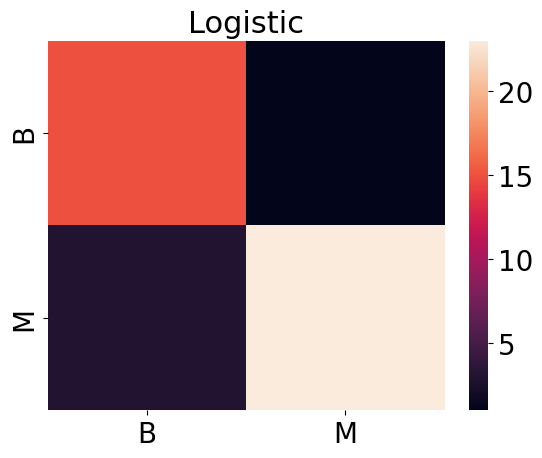

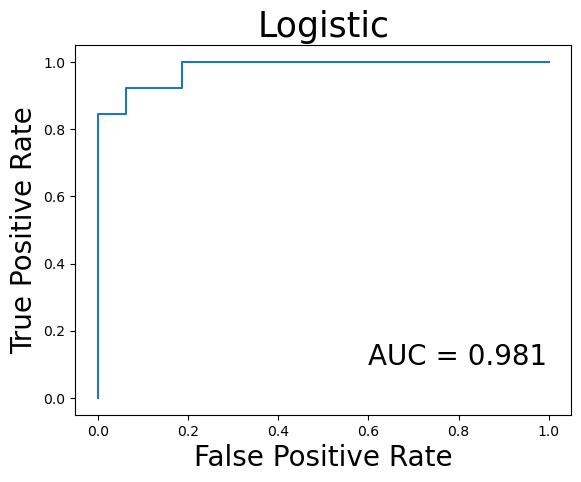

In [18]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
accuracy_score(test_target,test_predict)
confusion_matrix(test_target,test_predict)
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('Logistic',fontsize=22)
y_score = log.decision_function(test_features)
fpr, tpr, thresholds = roc_curve(test_target, y_score)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Logistic',fontsize=25)
plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(fpr, tpr)),size = 20)    #文本中注释
# plt.text(0.8,0.1, 'AUC = '+str('%.3f' % metrics.auc(fpr, tpr)))    #文本中注释
plt.show()






In [19]:
tree_clf = DecisionTreeClassifier()

In [20]:
tree_clf.fit(train_features, train_target)
train_features.shape

(96, 1)

In [21]:
test_predict = tree_clf.predict(test_features)
test_predict

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0.])

In [22]:
tree_clf.score(test_features,test_target)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = tree_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
    
print(sum_score/100)

0.9274175824175828


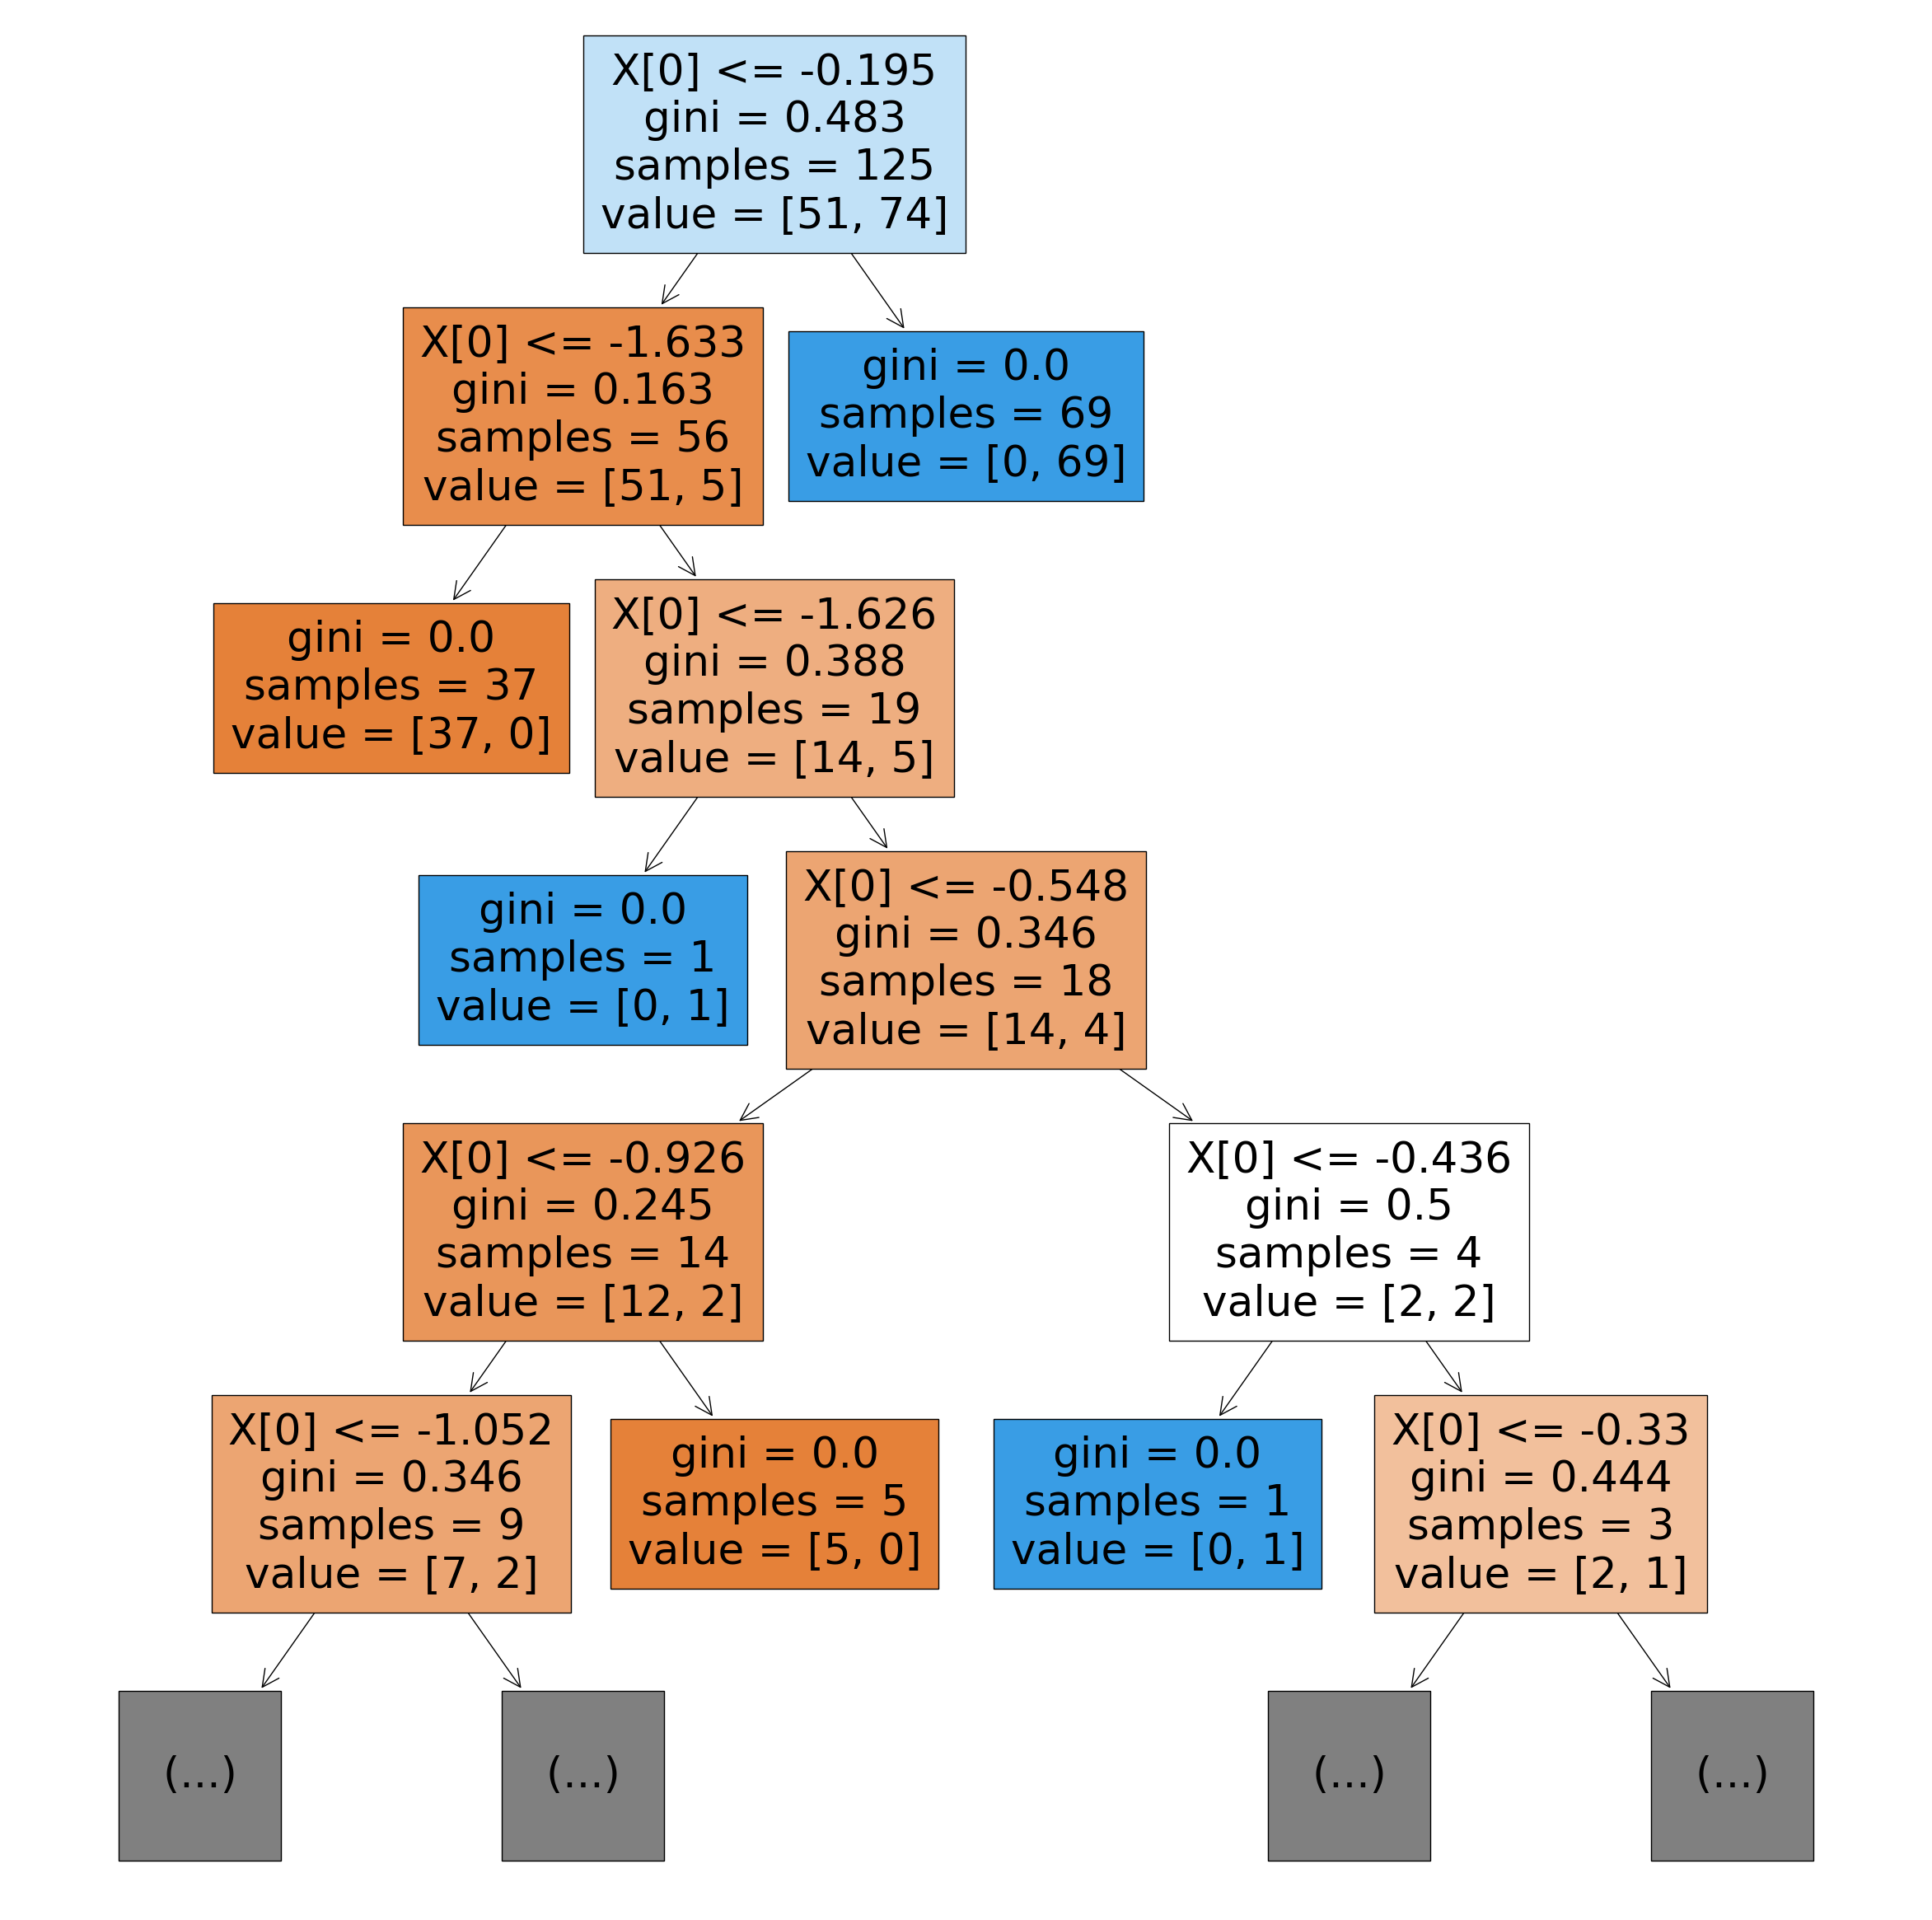

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# plot_tree(tree_clf) 
# print(features_lda)
fig = plt.figure(figsize=(30,30))
_ = plot_tree(
    tree_clf,
    filled=True,
    max_depth=5
)


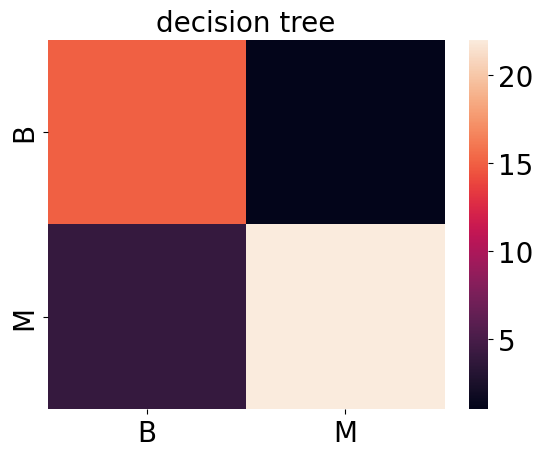

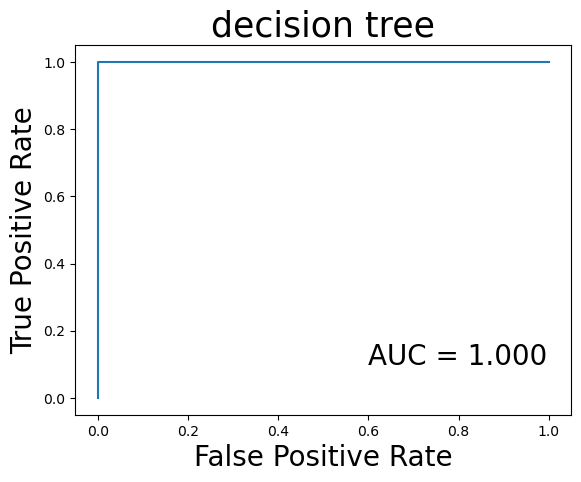

1.0

In [24]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,tree_clf.predict_proba(test_features)[:,1])
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('decision tree',fontsize=20)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('decision tree',fontsize=25)
plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [25]:
#randomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model_rf = model.fit(train_features,train_target)
score_rf = model_rf.score(test_features,test_target)
print(score_rf)

0.8809523809523809


In [26]:
model_rf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = model_rf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9254945054945055


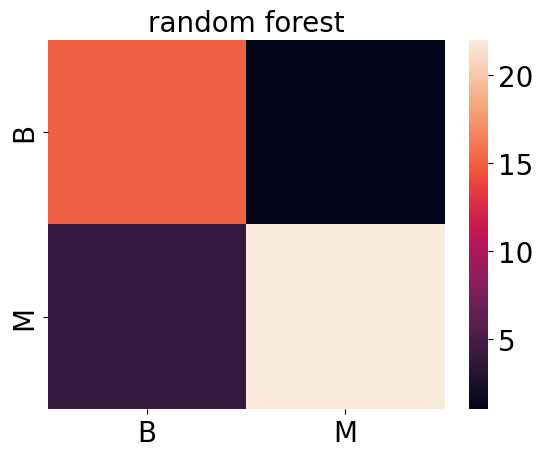

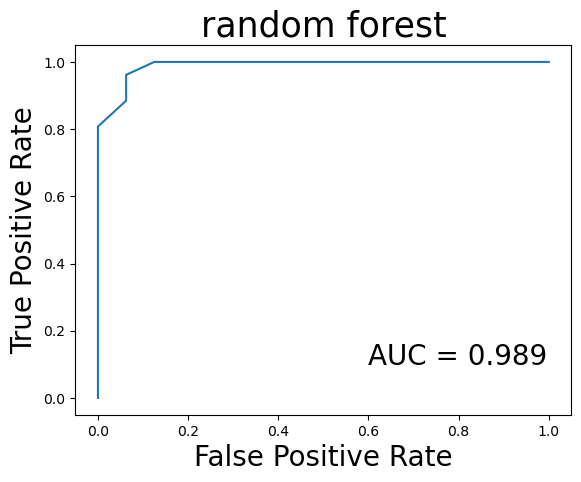

0.9891826923076923

In [27]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,model_rf.predict_proba(test_features)[:,1])
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('random forest',fontsize=20)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('random forest',fontsize=25)
plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [28]:
#svm
from sklearn.svm import SVC
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_linear.fit(train_features, train_target)
test_predict = svc_linear.predict(test_features)
svc_linear.score(test_features,test_target)

0.8809523809523809

In [29]:
svc_linear.predict(test_features)
model_rf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = svc_linear.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9459890109890111


(8,)
(8,)
(8,)


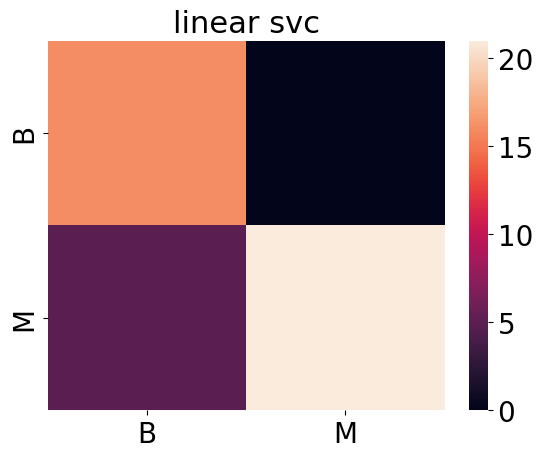

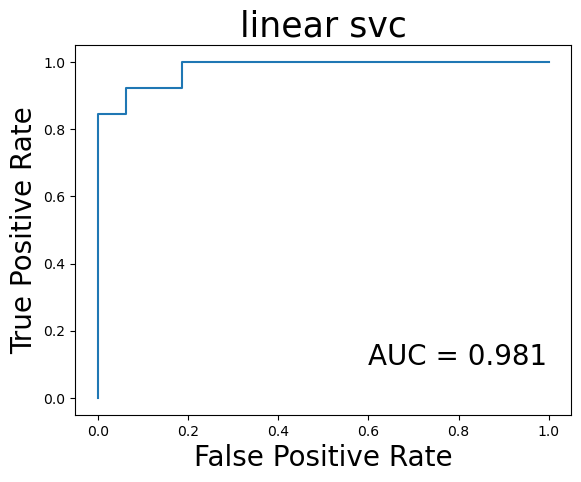

0.9807692307692308

In [30]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,svc_linear.decision_function(test_features), pos_label=1)
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('linear svc',fontsize=22)
print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))
# 此时的threshold就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负
print(thresholds.shape) # (45,))

# area = AUC(test_features,svc_linear.decision_function(test_features))
# print(area)     # 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('linear svc',fontsize=25)
plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [31]:
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0)
svc_rbf.fit(train_features, train_target)
test_predict = svc_rbf.predict(test_features)
svc_rbf.score(test_features,test_target)

0.8809523809523809

In [32]:
svc_rbf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = svc_rbf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9457692307692311


(10,)
(10,)


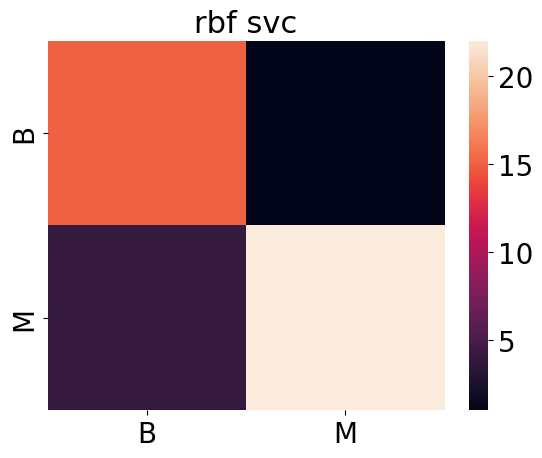

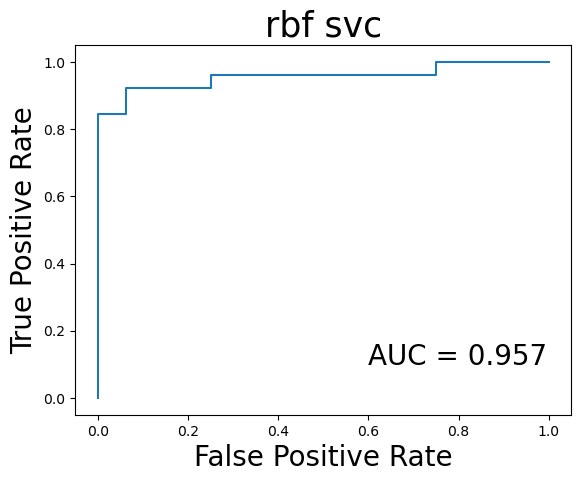

0.9567307692307693

In [33]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,svc_rbf.decision_function(test_features), pos_label=1)
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('rbf svc',fontsize=22)
print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('rbf svc',fontsize=25)
plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [34]:
svc_poly = SVC(kernel="poly",degree=3,coef0=0)
svc_poly.fit(train_features, train_target)
test_predict = svc_poly.predict(test_features)
svc_poly.score(test_features,test_target)

0.8809523809523809

In [35]:
svc_poly.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = svc_poly.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.8967582417582425


(8,)
(8,)


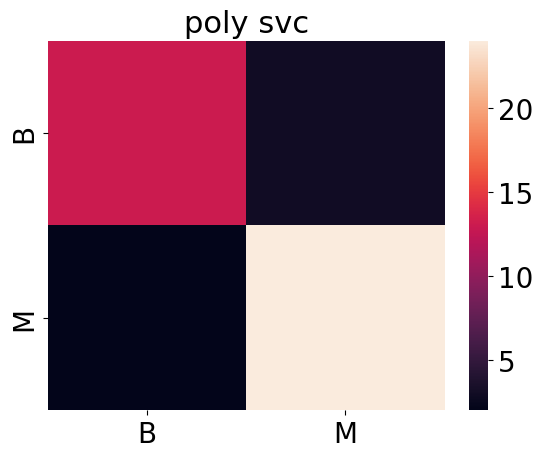

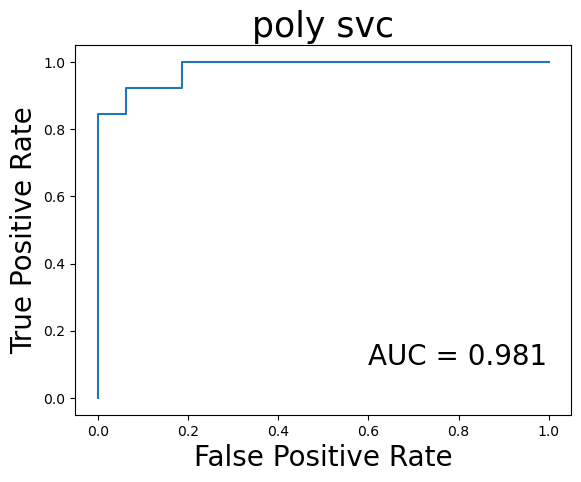

0.9807692307692308

In [36]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,svc_poly.decision_function(test_features), pos_label=1)
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('poly svc',fontsize=22)
print(FPR.shape)        # (45,))
print(recall.shape)     # (45,))

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('poly svc',fontsize=25)
plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [37]:
#集成算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1)
svc_poly = SVC(kernel="poly",degree=3,coef0=0)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='hard')
#, ('tree', tree_clf)
voting_clf.fit(train_features, train_target)

for clf in (log_clf, svc_linear,svc_poly,svc_rbf, voting_clf):
    clf.fit(train_features, train_target)
    print(clf.__class__.__name__, clf.score(test_features, test_target))


LogisticRegression 0.9047619047619048
SVC 0.8809523809523809
SVC 0.8809523809523809
SVC 0.8809523809523809
VotingClassifier 0.8809523809523809


In [38]:
voting_clf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = voting_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9454395604395607


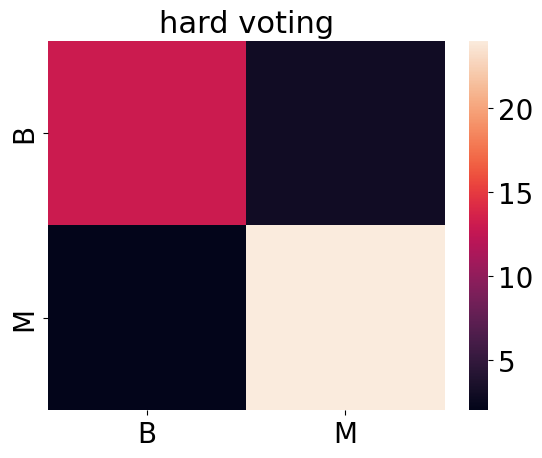

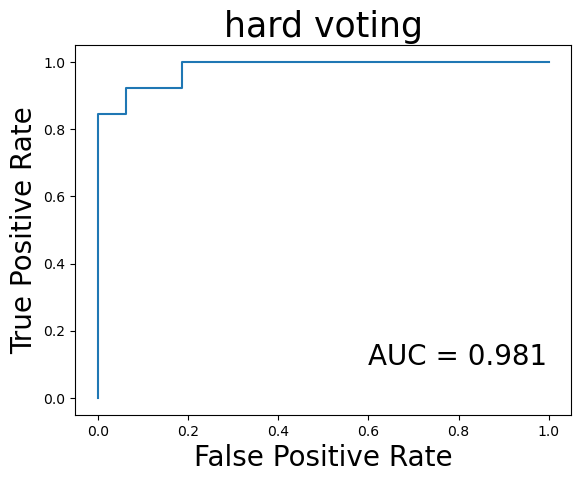

0.9807692307692308

In [39]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

# FPR, recall, thresholds = roc_curve(test_target,voting_clf.decision_function(test_features))
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('hard voting',fontsize=22)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('hard voting',fontsize=25)

plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [40]:
log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
     estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='soft')
#, ('tree', tree_clf)
voting_clf.fit(train_features, train_target)
for clf in (log_clf,  svc_linear,svc_poly,svc_rbf, voting_clf):
    clf.fit(train_features, train_target)
    print(clf.__class__.__name__, clf.score(test_features, test_target))

LogisticRegression 0.9047619047619048
SVC 0.8809523809523809
SVC 0.8809523809523809
SVC 0.8809523809523809
VotingClassifier 0.9047619047619048


In [41]:
voting_clf.predict(test_features)

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = voting_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9409340659340663


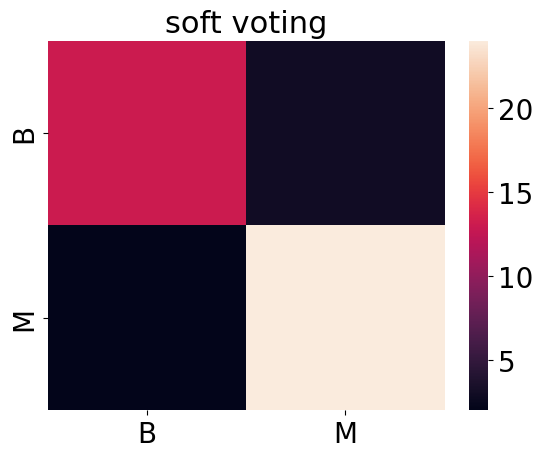

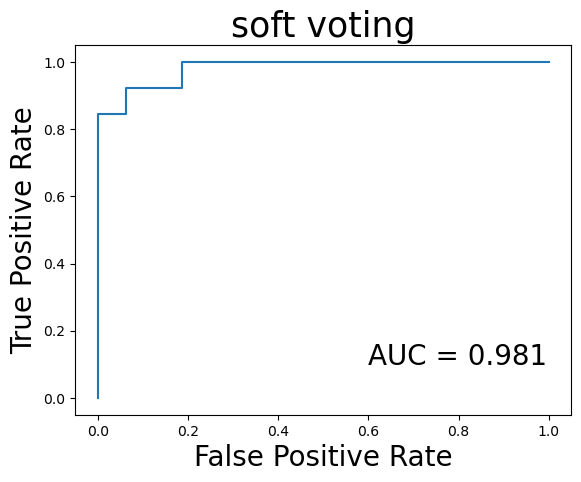

0.9807692307692308

In [42]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,voting_clf.predict_proba(test_features)[:,1])
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('soft voting',fontsize=22)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('soft voting',fontsize=25)

plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [43]:
from sklearn.ensemble import StackingClassifier
log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

log_ensemble = LogisticRegression()

stk_clf = StackingClassifier(
      estimators=[('lr', log_clf), ('svc_l', svc_linear),
                  ('svc_p',svc_poly),('svc_r',svc_rbf),('tr',tree_clf)],
    final_estimator=log_ensemble)

stk_clf.fit(train_features, train_target)

stk_clf.score(test_features, test_target)

0.8809523809523809

In [44]:

rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = stk_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
print('交叉')
print(sum_score/100)

交叉
0.9383516483516486


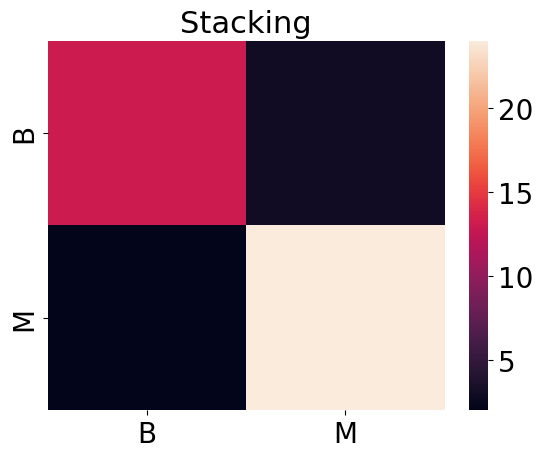

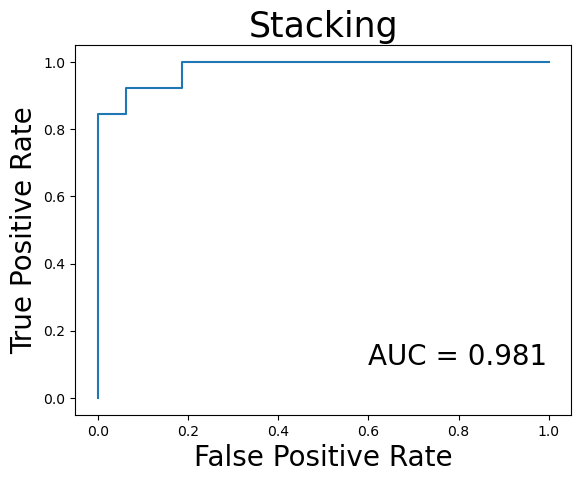

0.9807692307692308

In [45]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

FPR, recall, thresholds = roc_curve(test_target,stk_clf.predict_proba(test_features)[:,1])
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_target,test_predict),
           xticklabels=['B','M'],
           yticklabels=['B','M'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.title('Stacking',fontsize=22)
# 0.9696400000000001

# 画出ROC曲线

plt.figure()
plt.plot(FPR, recall)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Stacking',fontsize=25)

plt.text(0.6,0.1, 'AUC = '+str('%.3f' % metrics.auc(FPR, recall)),size = 20)    #文本中注释
plt.show()


from sklearn import metrics
metrics.auc(FPR, recall)

In [46]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10)


log_clf = LogisticRegression(penalty='l2',max_iter = 10000000,n_jobs=-1)
svc_linear = SVC(kernel = "linear",max_iter=-1,probability=True)
svc_poly = SVC(kernel="poly",degree=3,coef0=0,probability=True)
svc_rbf = SVC(kernel="rbf",degree=3,coef0=0,probability=True)
tree_clf = DecisionTreeClassifier()

voting_clf = VotingClassifier(
     estimators=[('lr', log_clf), ('svc_l', svc_linear),('svc_p',svc_poly),('svc_r',svc_rbf)],
    voting='soft')
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    # print(train_index)
    # print(test_index)
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_svm = voting_clf.fit(X_train,y_train)
    score_svm=model_svm.score(X_test,y_test)
    sum_score+=score_svm
    
print(sum_score/100)

0.9452747252747254


In [47]:
rkf=RepeatedKFold(n_splits=10,n_repeats=10)
sum_score = 0

for train_index, test_index in rkf.split(features_lda):
    X_train =pd.DataFrame(features_lda).iloc[train_index]
    X_test =pd.DataFrame(features_lda).iloc[test_index]
    y_train =pd.DataFrame(target).iloc[train_index]
    y_test =pd.DataFrame(target).iloc[test_index]
    model_ = voting_clf.fit(X_train,y_train)
    score_=model_.score(X_test,y_test)
    sum_score+=score_
    
print(sum_score/100)

0.9454945054945054


In [48]:
# from sklearn.decomposition import PCA

In [49]:
# pca_95 = PCA(n_components=100)

In [50]:
# features_95 = pca_95.fit_transform(features_SS)

In [51]:
# features_95

In [52]:
# train_features_full, test_features, train_target_full, test_target = train_test_split(
#     features_95, target, 
#     test_size = 0.15)
# print(train_features_full.shape)
# print(train_target_full.shape)
# print(test_features.shape)
# print(test_target.shape)
# train_features, validation_features, train_target, validation_target = train_test_split(
#     train_features_full, train_target_full, 
#     test_size = 0.15)
# print(train_features.shape)
# print(train_target.shape)
# print(validation_features.shape)
# print(validation_target.shape)
# print(test_features.shape)
# print(test_target.shape)

In [53]:
# from tensorflow import keras
# input_  = keras.layers.Input(shape = train_features.shape[1:])
# hidden1 = keras.layers.Dense(10,activation='selu')(input_)
# hidden2 = keras.layers.Dense(5,activation='selu')(hidden1)
# concat = keras.layers.Concatenate()([input_, hidden2])
# output = keras.layers.Dense(1,activation='sigmoid')(concat)
# model_wide = keras.Model(inputs=[input_], outputs=[output])

In [54]:
# model_wide.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [55]:
# model_wide.fit(train_features, train_target, batch_size = 20, epochs=200,
#          validation_data=(validation_features, validation_target))

In [56]:
# features_len = features_95.shape[1]

# features_len

In [57]:
# train_features_A = train_features[:,:features_len//3]
# train_features_B = train_features[:,features_len//3:]

# validation_features_A = validation_features[:,:features_len//3]
# validation_features_B = validation_features[:,features_len//3:]
# train_features_B

In [58]:
# input_A = keras.layers.Input(shape=[features_len//3], name="wide_input")
# input_B = keras.layers.Input(shape=[features_len-features_len//3], name="deep_input")
# hidden1_ = keras.layers.Dense(5, activation="selu")(input_B)
# hidden2_ = keras.layers.Dense(3, activation="selu")(hidden1_)
# concat_ = keras.layers.concatenate([input_A, hidden2_])
# output_ = keras.layers.Dense(1,activation='sigmoid')(concat_)
# model_combine = keras.Model(inputs=[input_A, input_B], outputs=[output_])

In [59]:
# model_combine.compile(loss = 'binary_crossentropy', metrics = 'accuracy', optimizer='rmsprop')

In [60]:
# model_combine.fit([train_features_A, train_features_B],train_target,batch_size = 20, epochs=150,
#                  validation_data=((validation_features_A,validation_features_B), validation_target))

In [61]:
# tensorboard_cb = keras.callbacks.TensorBoard(log_dir='output/logs',histogram_freq=1,embeddings_freq=1)

In [62]:
# model_combine.fit((train_features_A, train_features_B),train_target,batch_size = 20, epochs=200,
#                  validation_data=((validation_features_A,validation_features_B), validation_target),
#                   callbacks=tensorboard_cb)